# 五阶段双S型曲线公式推导

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
# 导入所需的库
from sympy import symbols, integrate, latex, Function, Eq, simplify, sympify
from sympy import init_printing

import numpy as np

init_printing(use_unicode=True)


def compute_motion(jerk, t_var, initial_conditions):
    """通过积分计算加速度、速度和位移"""
    a_0, v_0, s_0 = initial_conditions
    a = integrate(jerk, t_var) + a_0
    v = integrate(a, t_var) + v_0
    s = integrate(v, t_var) + s_0
    return a, v, s


def compute_trajectory(jerks, times, initial_conditions, t_var):
    """代入各个阶段的jerks,和初始运动条件,计算整个运动过程

    Args:
        jerks: 在每个阶段的jerk值, 为常值
        times: 每个阶段的时间
        initial_conditions: 初始条件, 为加速度、速度、位移
        t_var: 时间变量
    """
    results = {"j": [], "a": [], "v": [], "s": []}

    for i, jerk in enumerate(jerks):
        a, v, s = compute_motion(jerk, t_var, initial_conditions)
        results["j"].append((jerk, times[i]))
        results["a"].append((a, times[i]))
        results["v"].append((v, times[i]))
        results["s"].append((s, times[i]))
        initial_conditions = [a.subs(t_var, times[i]), v.subs(t_var, times[i]), s.subs(t_var, times[i])]

    return results


def show_results(results, show_tex=False):
    """显示运动过程的结果"""

    def show_eq(eq):
        eq_spf = simplify(eq)
        display(eq_spf)
        if show_tex:
            print(latex(eq_spf))

    t_var = symbols("t")
    for i, (a, v, s) in enumerate(zip(results["a"], results["v"], results["s"])):
        print(f"\n====== 第{i+1}阶段 ======")
        t_i = a[1]
        show_eq(Eq(Function("a")(t_var), a[0]))
        show_eq(Eq(Function(f"a_{i+1}")(t_i), a[0].subs(t_var, t_i)))
        show_eq(Eq(Function("v")(t_var), v[0]))
        show_eq(Eq(Function(f"v_{i+1}")(t_i), v[0].subs(t_var, t_i)))
        show_eq(Eq(Function("s")(t_var), s[0]))
        show_eq(Eq(Function(f"s_{i+1}")(t_i), s[0].subs(t_var, t_i)))

## Type (VII)


====== 第1阶段 ======


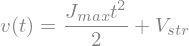

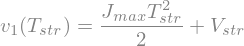

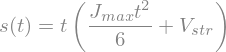

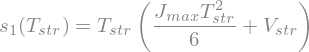


====== 第2阶段 ======


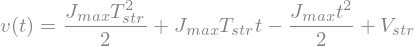

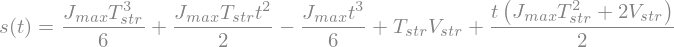


====== 第3阶段 ======



====== 第4阶段 ======


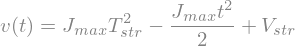

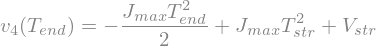

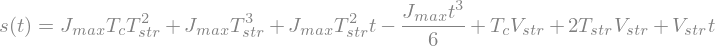

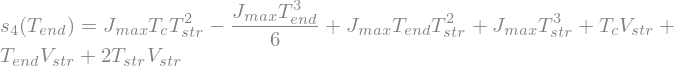


====== 第5阶段 ======


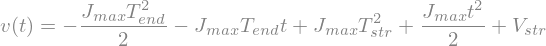

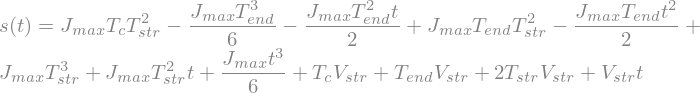

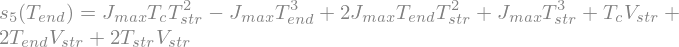

In [3]:
# 定义符号变量
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

# 定义加加速度和阶段持续时间
jerks = [J_max, -J_max, sympify("0"), -J_max, J_max]
times = [T_str, T_str, T_c, T_end, T_end]
initial_conditions = [sympify("0"), V_str, sympify("0")]

# 计算运动过程
results = compute_trajectory(jerks, times, initial_conditions, t)

# 打印结果
show_results(results)

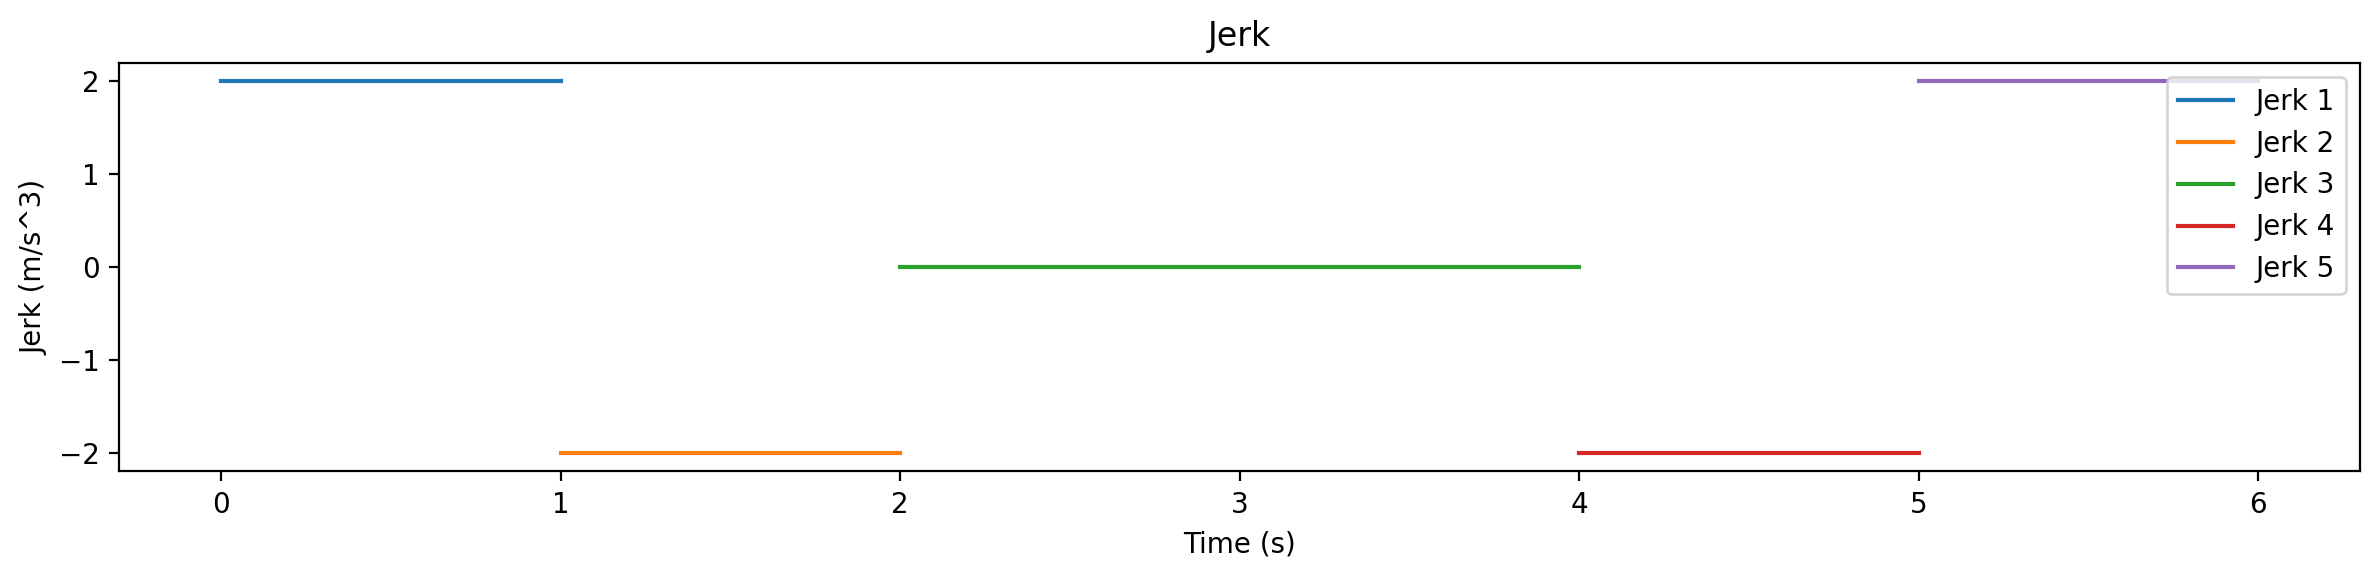

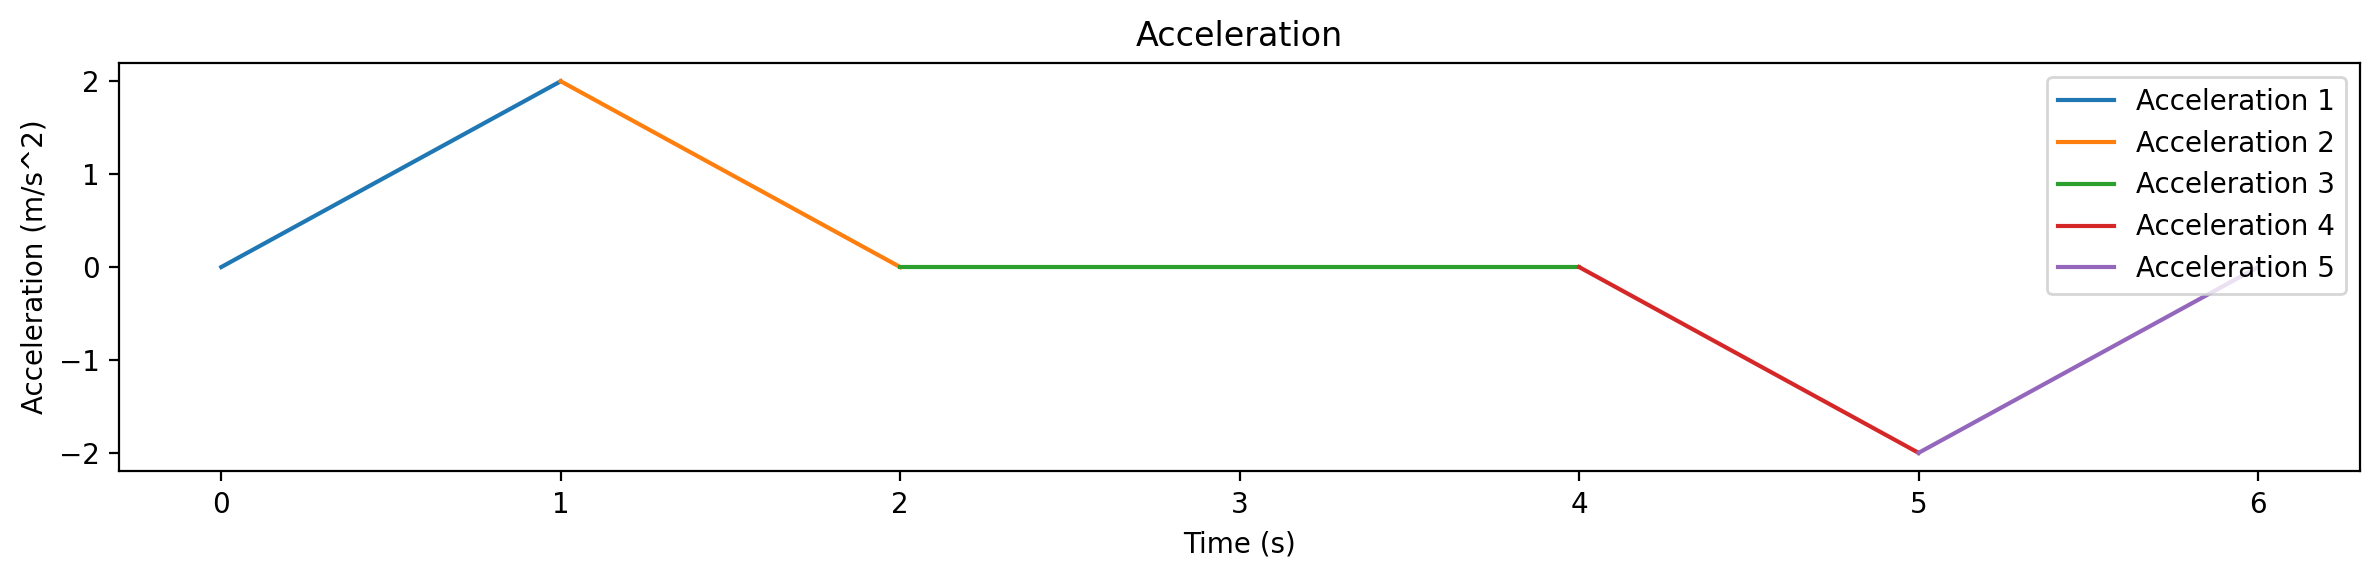

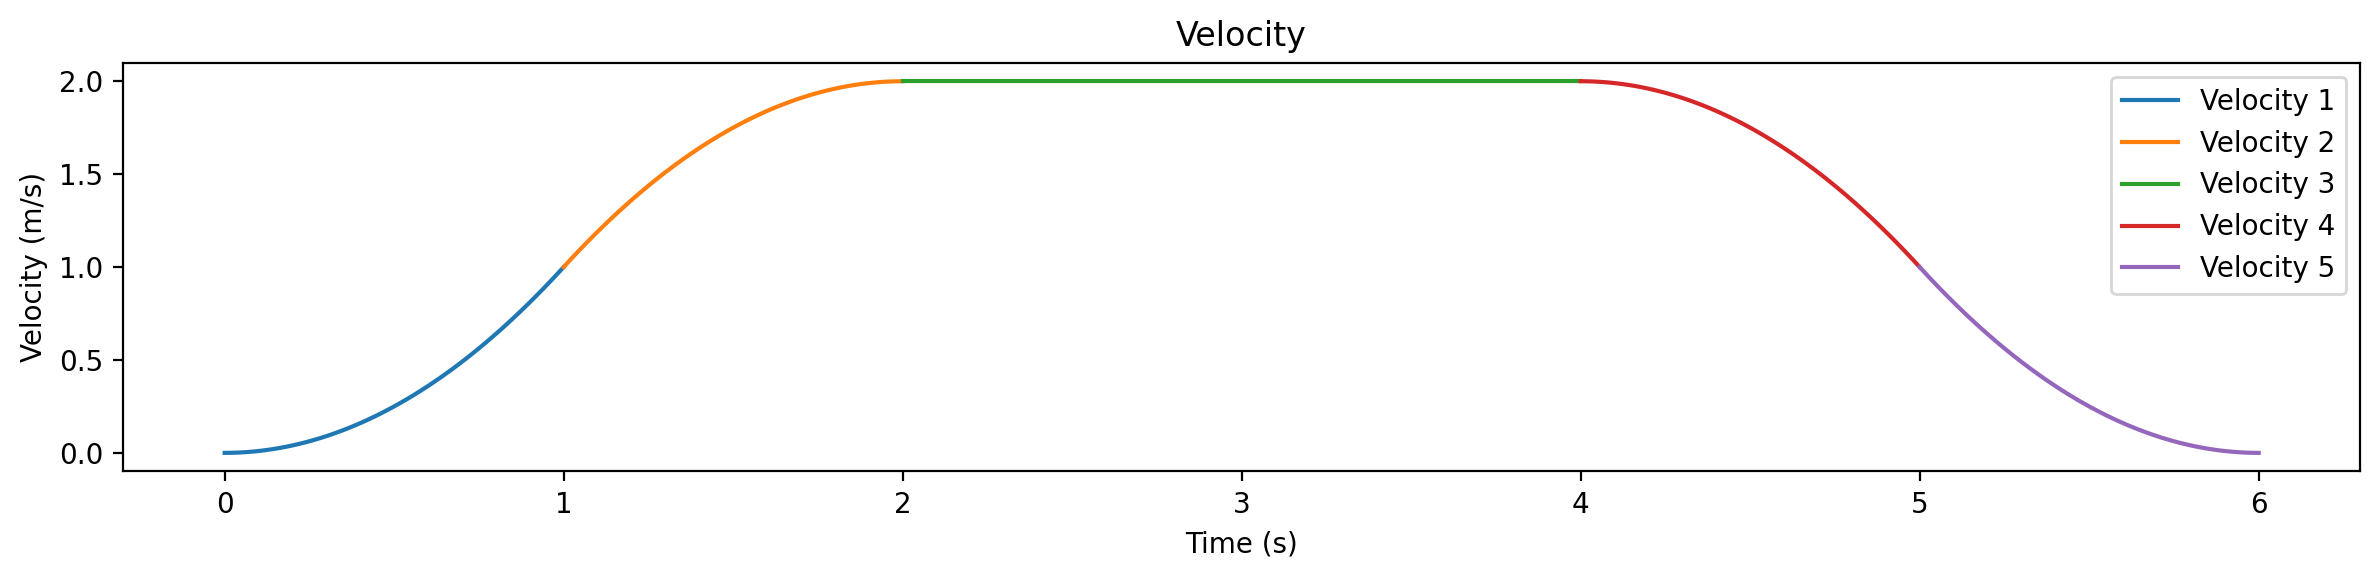

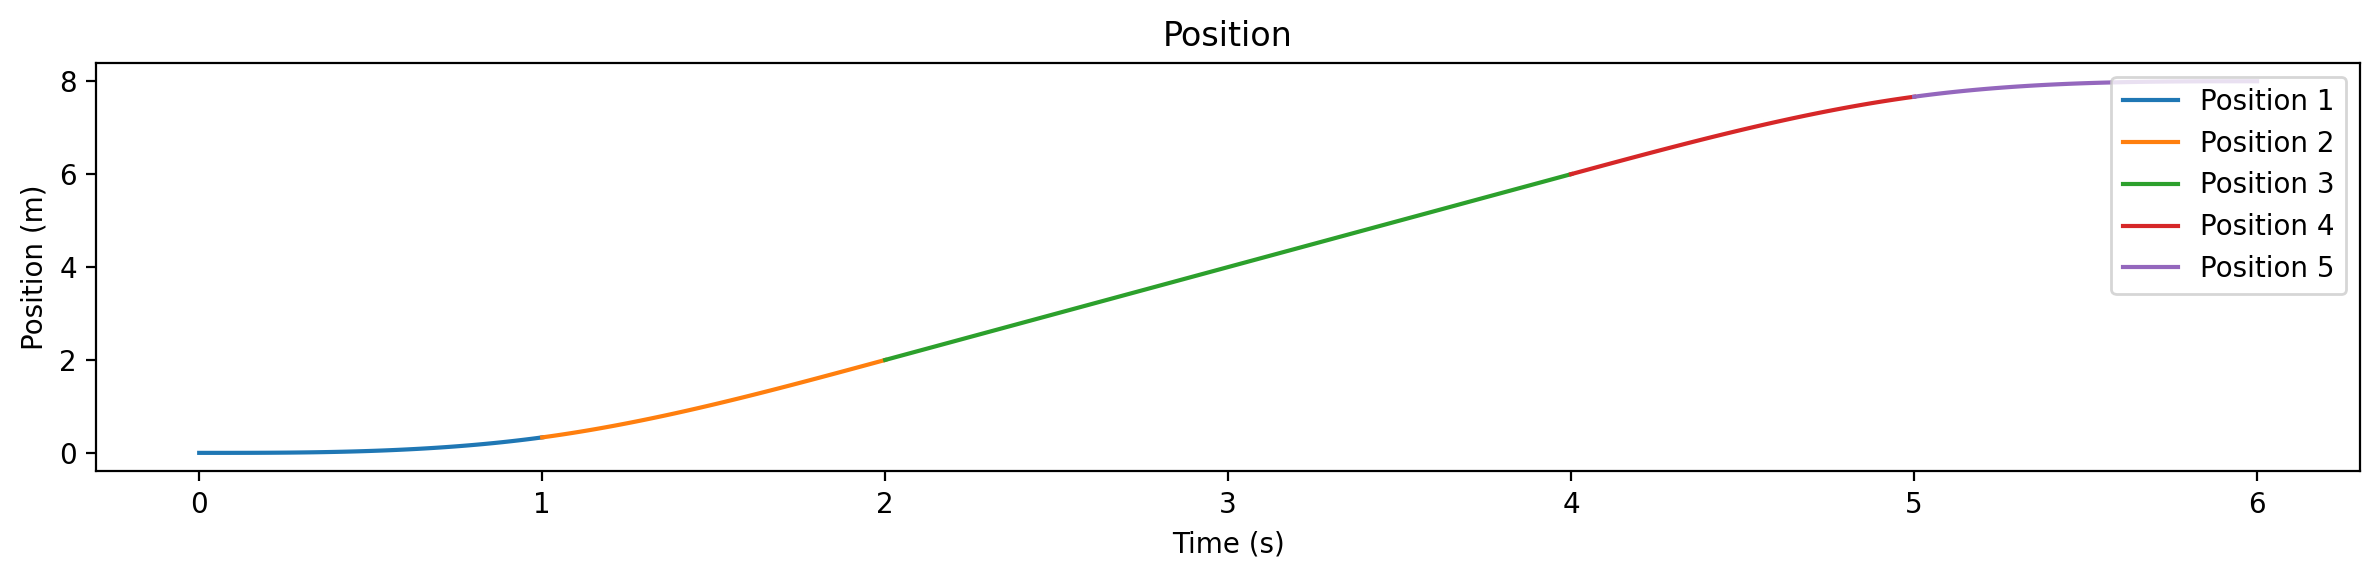

In [4]:
# 设置实际数值
J_max_val = 2
V_str_val = 0
T_str_val = 1
T_c_val = 2
T_end_val = 1

# 符号代入数值
subs_list = [(J_max, J_max_val), (V_str, V_str_val), (T_str, T_str_val), (T_c, T_c_val), (T_end, T_end_val)]

j_funcs_val = [j[0].subs(subs_list) for j in results["j"]]
a_funcs_val = [a[0].subs(subs_list) for a in results["a"]]
v_funcs_val = [v[0].subs(subs_list) for v in results["v"]]
s_funcs_val = [s[0].subs(subs_list) for s in results["s"]]

T = [0, T_str_val, T_str_val, T_c_val, T_end_val, T_end_val]
T_csum = np.cumsum(T)


def plot_motion(T_csum, funcs_val, labels, title, ylabel):
    plt.figure(figsize=(12, 3))
    for i, (t_start, t_end, val) in enumerate(zip(T_csum[:-1], T_csum[1:], funcs_val)):
        t_range = np.linspace(t_start, t_end, 100)
        val_range = [val.subs(t, t_i - t_start) for t_i in t_range]
        plt.plot(t_range, val_range, label=f"{labels} {i+1}")
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.tight_layout()


# 绘制曲线
plot_motion(T_csum, j_funcs_val, "Jerk", "Jerk", "Jerk (m/s^3)")
plot_motion(T_csum, a_funcs_val, "Acceleration", "Acceleration", "Acceleration (m/s^2)")
plot_motion(T_csum, v_funcs_val, "Velocity", "Velocity", "Velocity (m/s)")
plot_motion(T_csum, s_funcs_val, "Position", "Position", "Position (m)")
plt.show()

## Type (V)


====== 第1阶段 ======



====== 第2阶段 ======


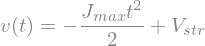

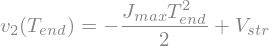

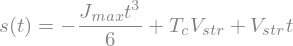

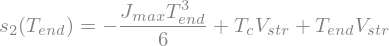


====== 第3阶段 ======


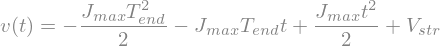

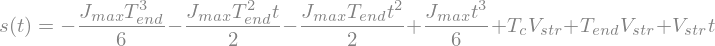

In [5]:
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

jerks = [sympify("0"), -J_max, J_max]
times = [T_c, T_end, T_end]
initial_conditions = [sympify("0"), V_str, sympify("0")]

results = compute_trajectory(jerks, times, initial_conditions, t)

show_results(results)

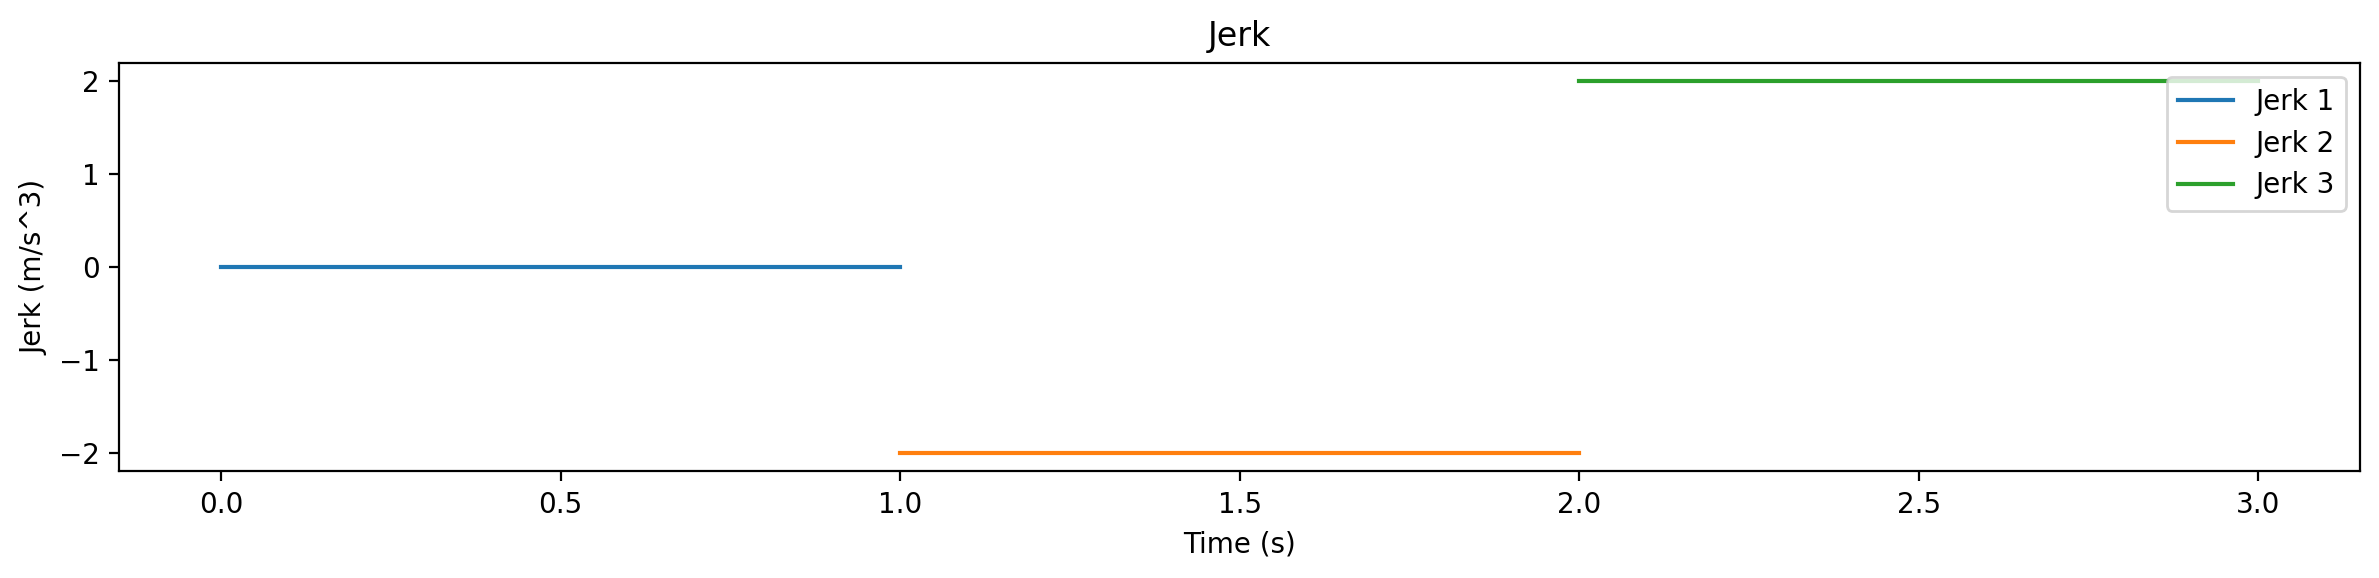

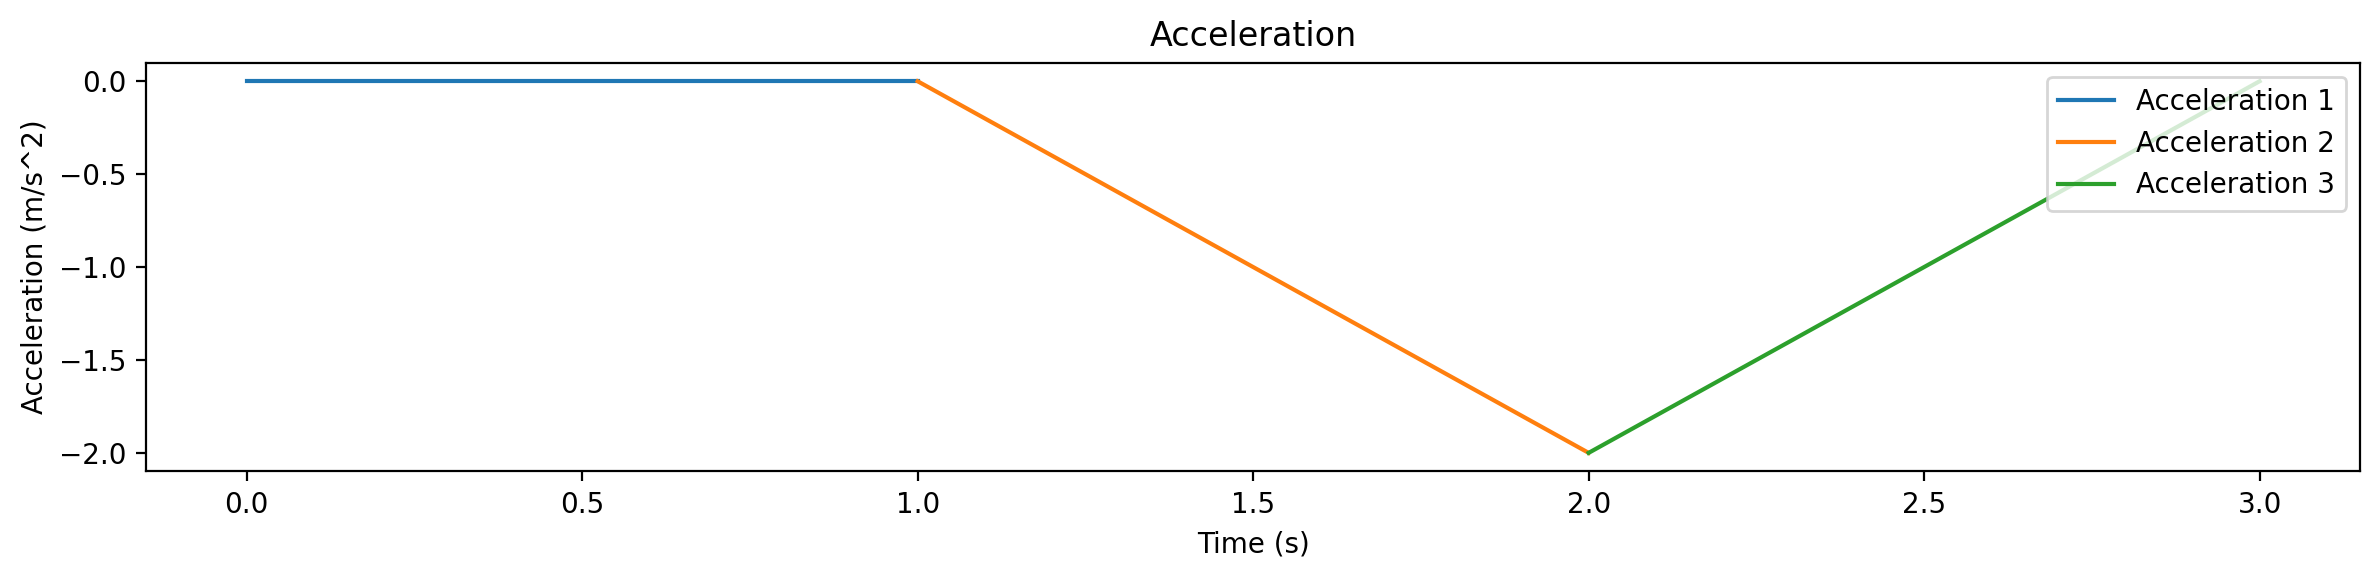

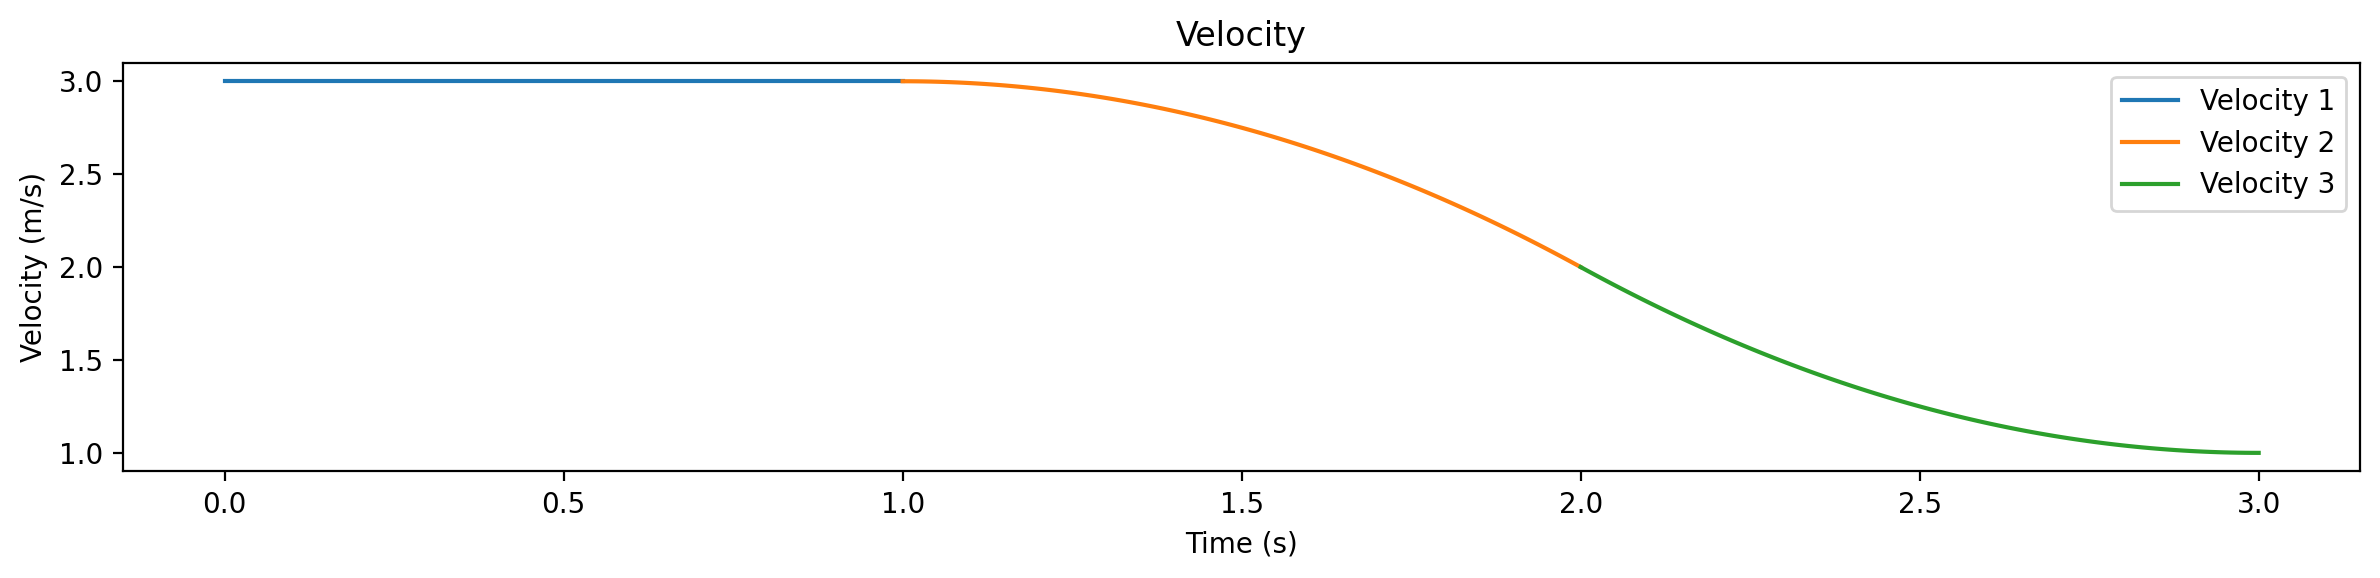

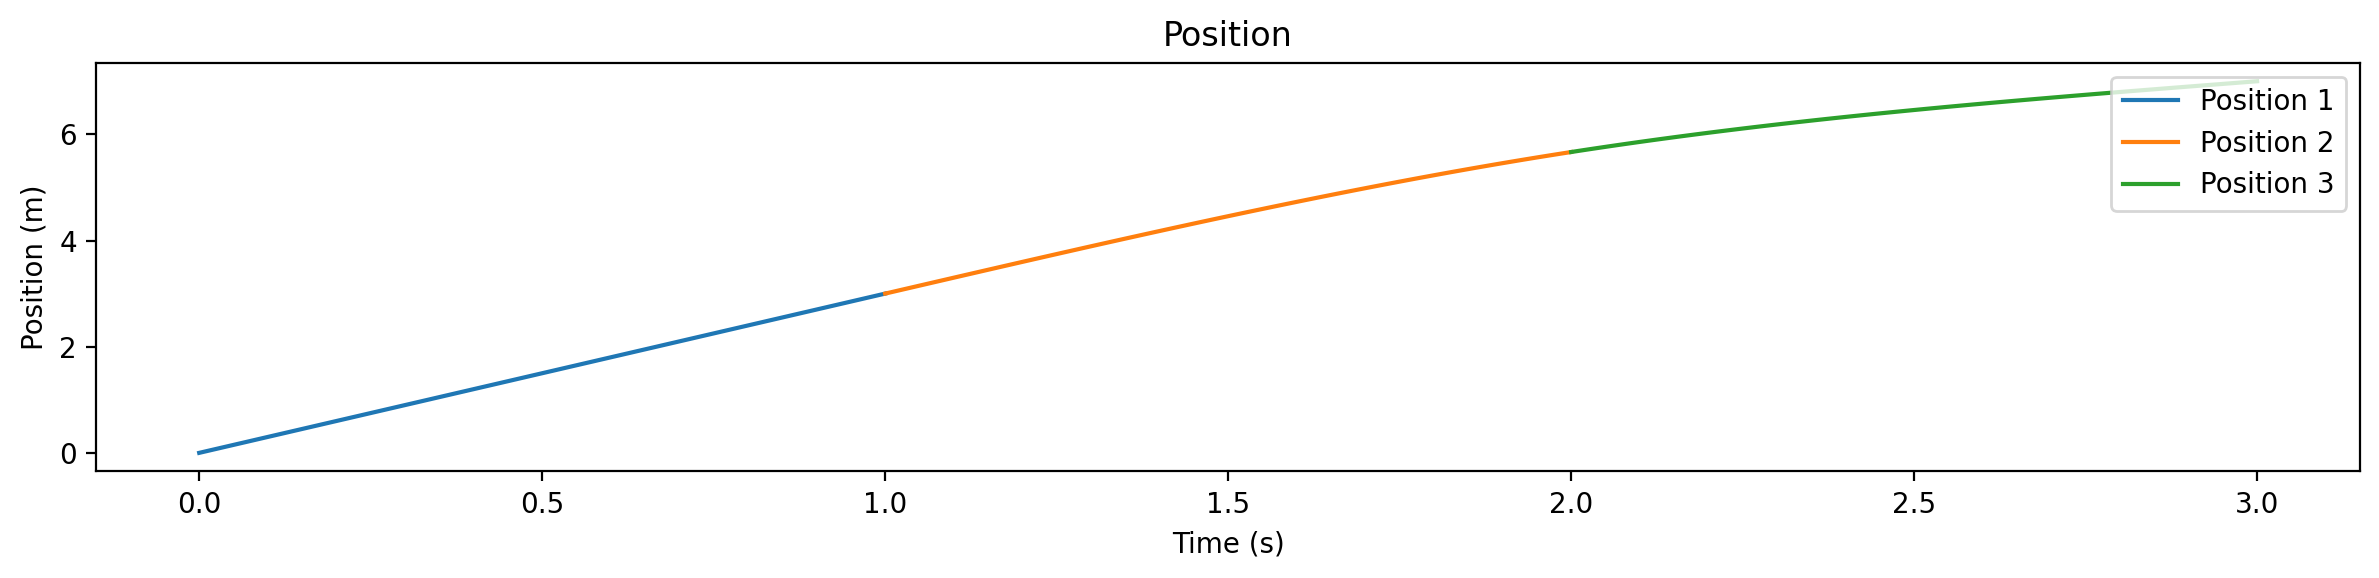

In [6]:
J_max_val = 2  # 最大加加速度
V_str_val = 3  # 初始速度
T_str_val = 1  # 第一个和第二个阶段的时间
T_c_val = 1  # 第三个阶段的时间
T_end_val = 1  # 第四个和第五个阶段的时间

# 符号代入数值
subs_list = [(J_max, J_max_val), (V_str, V_str_val), (T_str, T_str_val), (T_c, T_c_val), (T_end, T_end_val)]

j_funcs_val = [j[0].subs(subs_list) for j in results["j"]]
a_funcs_val = [a[0].subs(subs_list) for a in results["a"]]
v_funcs_val = [v[0].subs(subs_list) for v in results["v"]]
s_funcs_val = [s[0].subs(subs_list) for s in results["s"]]

T = [0, T_str_val, T_str_val, T_c_val, T_end_val, T_end_val]
T_csum = np.cumsum(T)


# 绘制曲线
plot_motion(T_csum, j_funcs_val, "Jerk", "Jerk", "Jerk (m/s^3)")
plot_motion(T_csum, a_funcs_val, "Acceleration", "Acceleration", "Acceleration (m/s^2)")
plot_motion(T_csum, v_funcs_val, "Velocity", "Velocity", "Velocity (m/s)")
plot_motion(T_csum, s_funcs_val, "Position", "Position", "Position (m)")
plt.show()

## Type (II)


====== 第1阶段 ======


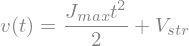

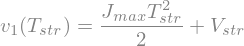

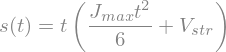

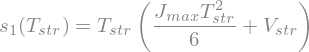


====== 第2阶段 ======


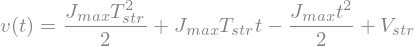

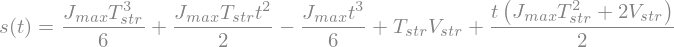

In [7]:
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

jerks = [J_max, -J_max]
times = [T_str, T_str]
initial_conditions = [sympify("0"), V_str, sympify("0")]

results = compute_trajectory(jerks, times, initial_conditions, t)

show_results(results)

## Type (III)


====== 第1阶段 ======


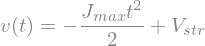

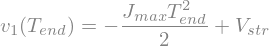

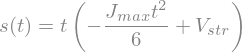

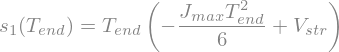


====== 第2阶段 ======


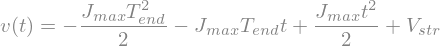

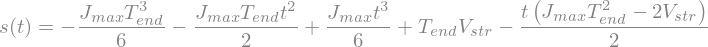

In [8]:
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

jerks = [-J_max, J_max]
times = [T_end, T_end]
initial_conditions = [sympify("0"), V_str, sympify("0")]

results = compute_trajectory(jerks, times, initial_conditions, t)

show_results(results)

## Type (IV)


====== 第1阶段 ======


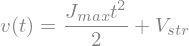

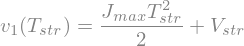

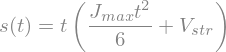

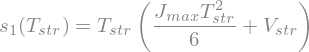


====== 第2阶段 ======


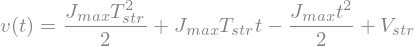

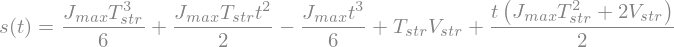


====== 第3阶段 ======


In [9]:
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

jerks = [J_max, -J_max, sympify("0")]
times = [T_str, T_str, T_c]
initial_conditions = [sympify("0"), V_str, sympify("0")]

results = compute_trajectory(jerks, times, initial_conditions, t)

show_results(results)

## Type (VI)


====== 第1阶段 ======


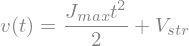

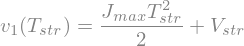

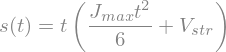

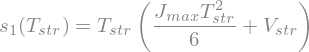


====== 第2阶段 ======


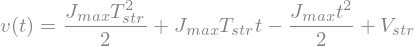

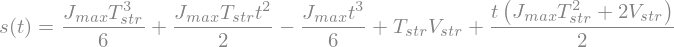


====== 第3阶段 ======


In [10]:
t = symbols("t")
J_max, V_str, T_str, T_c, T_end = symbols("J_max V_str T_str T_c T_end")

jerks = [J_max, -J_max, sympify("0")]
times = [T_str, T_str, T_c]
initial_conditions = [sympify("0"), V_str, sympify("0")]

results = compute_trajectory(jerks, times, initial_conditions, t)

show_results(results)